<a href="https://colab.research.google.com/github/kimyeseong984/-yolo-v8/blob/main/yolo_v8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 6.25M/6.25M [00:00<00:00, 57.4MB/s]


Saving 2.jpg to 2.jpg

0: 448x640 18 persons, 2 handbags, 382.6ms
Speed: 14.7ms preprocess, 382.6ms inference, 40.0ms postprocess per image at shape (1, 3, 448, 640)


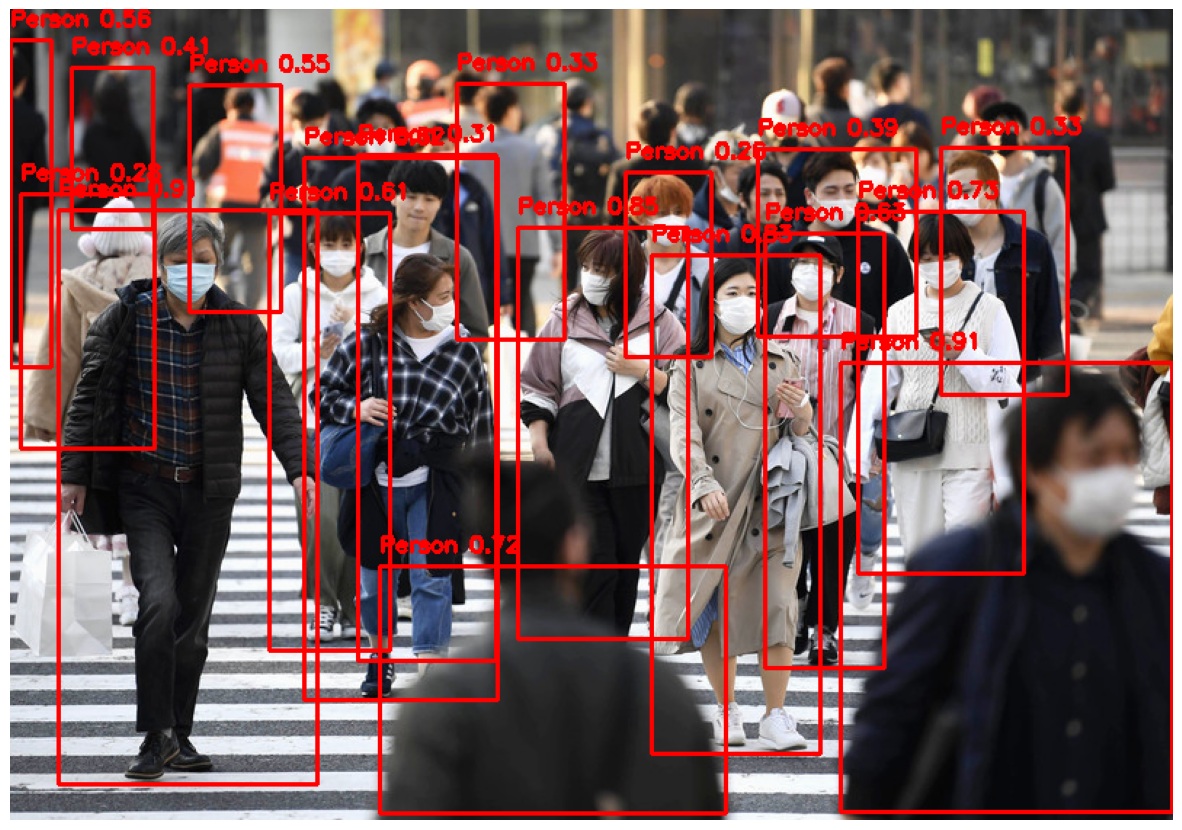

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 필요한 라이브러리 설치
!pip install ultralytics
!pip install opencv-python

# 필요한 라이브러리 임포트
import cv2
from ultralytics import YOLO
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

# YOLO 모델 로드
model = YOLO('yolov8n.pt')  # 'n'은 nano 버전, 더 정확한 결과를 원하면 's', 'm', 'l', 'x' 사용 가능

# 이미지 업로드
uploaded = files.upload()  # Colab에서 이미지를 업로드할 수 있는 위젯이 나타남

# 업로드된 이미지 처리
for filename in uploaded.keys():
    # 이미지 읽기
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # YOLO로 객체 감지 실행
    results = model(image)

    # 결과 시각화
    for r in results:
        # 박스 그리기
        boxes = r.boxes
        for box in boxes:
            # 클래스가 사람(0)인 경우만 처리
            if box.cls[0] == 0:  # 0은 COCO 데이터셋에서 '사람' 클래스를 나타냄
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                conf = box.conf[0]

                # 박스 그리기
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                # 신뢰도 표시
                cv2.putText(image, f'Person {conf:.2f}', (x1, y1-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # 결과 표시
    plt.figure(figsize=(15, 15))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # 결과 이미지 저장
    output_filename = f'detected_{filename}'
    plt.imsave(output_filename, image)
    files.download(output_filename)  # 처리된 이미지 다운로드